# Regional temperature distribution

In [1]:
import sys
import os
aps_path = os.path.dirname(os.path.abspath("."))
sys.path.append(aps_path)
print(aps_path)

C:\Users\kmu\GitHub\APS\aps


In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from aps_io.get_arome import nc_info, nc_load

In [3]:
%matplotlib inline

Read temperature data from netcdf file and clip to a subregion.

In [13]:
jd, altitude, land_area_fraction, nc_vars = nc_load("../data/t2myr_kf0_5km_20161027_00.nc",
                                                    ['air_temperature_2m'], [59.0, 60.0, 8.5, 9.0], [6, 30])


### DIMENSIONS ###
OrderedDict([('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 67
), ('rlon', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlon', size = 1060
), ('rlat', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlat', size = 3680
)])
-	time
-	rlon
-	rlat
### VARIABLES ###
-	time
-	forecast_reference_time
-	projection_3
-	rlon
-	rlat
-	longitude
-	latitude
-	altitude
-	air_temperature_2m
Variables 'x' and 'y' are not provided.
Variable 'land_area_fraction' is not provided.


In [14]:
# create elevation masks
below500 = np.ma.masked_less_equal(altitude, 500.0).mask
print(altitude, below500)
print(nc_vars)

[] False
{'air_temperature_2m': array([], shape=(24, 1059, 0), dtype=float32)}


C:\Anaconda\envs\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


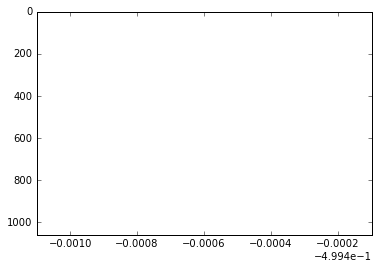

In [8]:
temp = np.ma.masked_array(nc_vars['air_temperature_2m'][6, :, :], below500)
plt.imshow(temp, aspect='auto')
plt.show()